# 11. Integral Test and Income Streams

```{index} continuous compounding interest
```

In this lab, we show that it is possible due to continuous compounding of interest to deposit a fixed amount $P$ at time $t=0$, and then withdraw at times $t=1,2,3,...$  increasing amounts $A+Bt$ (where A>0 and B>0 are constants) "in perpetuity" while always maintaining a positive balance in the account.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

```{index} integral test
```

<h4>Integral Test</h4>

The integral test is one of the standard tests for convergence/divergence of an infinite series.  The basic idea of the test is that for a continous function $f(x)$ defined on the interval $1\le x < \infty$, the infinite series

$$\sum_{n=1}^{\infty} f(n) $$

and the improper integral

$$ \int_{x=1}^{\infty} f(x)\, dx $$

either both converge or both diverge.

```{index} p-series
```

```{index} convergent
```

```{index} divergent
```

<h4> p-series </h4>

The integral test can be used to determine all positive values of $p$ for which the $p$ series

$$\sum_{n=1}^{\infty} \frac{1}{n^p} $$

converges or diverges.

For example the case $p=1$ so we have the harmonic series

$$\sum_{n=1}^{\infty} \frac{1}{n}. $$

The corresponding improper integral is divergent:

$$\int_{x=1}^{\infty} \frac{1}{x}\,dx = \lim_{b\rightarrow \infty} \ln x \mid _1^{b} =  \lim_{b\rightarrow \infty} \ln b = \infty . $$

Thus the harmonic series is also divergent, as suggested by the circumscribed rectangles representing the first five terms in the harmonic series as shown in the figure below.

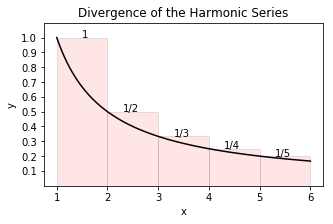

In [2]:
f = lambda x : 1/x
x=np.arange(1,6,.0001)
y=f(x)
x_left = np.arange(1,6,1)
plt.figure(figsize=(5,3))
plt.gca().set_xticks(np.arange(1,7,1))
plt.gca().set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.plot(x,y,'k',markersize=1)
plt.bar(x_left,1/x_left,width=1,alpha=0.1,align='edge',color='r',edgecolor='k')
plt.title('Divergence of the Harmonic Series')
plt.text(1.5,1,'1')
plt.text(2.3,.5,'1/2')
plt.text(3.3,.33,'1/3')
plt.text(4.3,.25,'1/4')
plt.text(5.3,.2,'1/5')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((0,1.1)) 
#plt.grid()
plt.savefig('harmonic.png')
plt.show()

On the other hand, a $p$-series with $p=2$ series must converge as shown by a convergent improper integral
$$\int_1^{\infty}\frac{1}{x^2}\,dx = \lim_{b\rightarrow\infty} -x^{-1}\mid_1^b = \lim_{b\rightarrow\infty} -\frac{1}{b}+1=1.$$
in comparison with inscribed rectangles representing the tail of the series 

$$\frac{1}{2^2}+\frac{1}{3^2}+...<\int_1^{\infty}\frac{1}{x^2}=1 \Rightarrow$$

$$\sum_{n=1}^{\infty} \frac{1}{n^2}= 1+\frac{1}{2^2}+\frac{1}{3^2}+...<1+\int_1^{\infty}\frac{1}{x^2}=2.$$

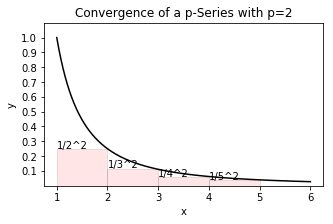

In [3]:
f = lambda x : 1/x**2
x=np.arange(1,6,.0001)
y=f(x)
x_right = np.arange(2,6,1)
plt.figure(figsize=(5,3))
plt.gca().set_xticks(np.arange(1,7,1))
plt.gca().set_yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.plot(x,y,'k',markersize=1)
plt.bar(x_right-1,1/x_right**2,width=1,alpha=0.1,align='edge',color='r',edgecolor='k')
plt.title('Convergence of a p-Series with p=2')
plt.text(1.,.25,'1/2^2')
plt.text(2.,1/8,'1/3^2')
plt.text(3.,1/16,'1/4^2')
plt.text(4.,1/25,'1/5^2')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((0,1.1)) 
#plt.grid()
plt.savefig('p2.png')
plt.show()

<h4> Income Streams</h4>

```{index} income streams
```

If $P$ dollars is invested into an account with interest compounded continously with annual interest rate $r=.05$ (i.e 5%), then after $t$ years the amount $P$ grows to $Pe^{rt}=Pe^{.05t}$.

Suppose $f(t)=200+10t$ dollars is invested into an account with the same interest rate at times $t=1,2,3$ (in years) and the total including interest is computed at $t=3$. 

The amount $\$ 210$ invested at $t=1$ grows to $A_1=\$ 210 e^{.05(3-1)}=210e^{.05(2).}$

The amount $\$ 220$ invested at $t=2$ grows to $A_2=\$ 220 e^{.05(3-2)}=220e^{.05(1).}$

The amount $\$ 230$ invested at $t=3$ grows to $A_3=\$ 230 e^{.05(3-3)}=230e^{.05(0)}=230.$

Note that 

$$A_1+A_2+A_3 < \int_1^3 (200+10t)e^{.05(3-t)}.$$


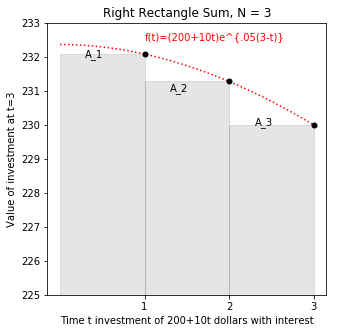

In [4]:
f = lambda t : (200+10*t)*math.e**(.05*(3-t))
a = 0; b = 3; N = 3
n = 10 # Use n*N+1 points to plot the function smoothly
#right endpoint rule
t = np.linspace(a,b,N+1)
y = f(t)
T = np.linspace(a,b,n*N+1)
Y = f(T)

plt.figure(figsize=(5,5))
plt.gca().set_xticks([1,2,3])
plt.plot(T,Y,'r', linestyle =':')
t_right = t[1:] # right endpoints
y_right = y[1:]
plt.plot(t_right,y_right,'k.',markersize=10)
plt.bar(t_right,y_right,width=-(b-a)/N,alpha=0.1,align='edge',color='k',edgecolor='k')
plt.title('Right Rectangle Sum, N = {}'.format(N))
plt.xlabel('Time t investment of 200+10t dollars with interest')
plt.ylabel('Value of investment at t=3')
plt.text(1,232.5,"f(t)=(200+10t)e^{.05(3-t)}",color='r')
plt.text(.3,232,"A_1")
plt.text(1.3,231,"A_2")
plt.text(2.3,230,"A_3")
plt.ylim((225, 233)) 
#plt.grid()
plt.savefig('3 period.png')
plt.show()

<h3>Lab</h3>

1) Suppose $f(t) = 10,000+500 t$ dollars is invested into an account (with the same interest rate) at times $t=1,2,3$ and 4 ($t$ in years). At time $t=4$, find the total value of the investment with interest $A_1+A_2+A_3+A_4.$ 
 


2) Show geometrically that the sum  $10,500 e^{.05(3)} + 11,000 e^{.05(2)} + 11,500 e^{.05} + 12,000 $ is less than $I_4=\int_0^4 (10,000+500 t) e^{.05 (4-t)} dt$.

3) Explain why 

$$I_4=\int_0^4 (10,000+500 t) e^{.05 (4-t)} dt =  e^{.05 (4)} \int_0^4 (10,000+500 t) e^{-.05 t} dt = e^{.05(4)}P_4 $$.



4)Explain why an amount $P_4=\int_0^4 (10,000+500 t) e^{-.05 t} dt$ invested at time $t=0$ will allow withdrawals whose total value with interest is  $A_1+A_2+A_3+A_4$.

5) Extend the reasoning in steps 1)-4) to show that  $P_N =  \int_0^N (10,000+500 t) e^{-.05t } dt $ deposited at $t=0$ is sufficient to allow $f(t) = 10,000+500 t$  to be withdrawn from the account at $t=1,2,...,N$.  Use integration by parts to find $P_{\infty} = \int_0^{\infty} (10,000+500 t) e^{-.05 t} dt $. (If this finite amount $P_{\infty}$ is  deposited at $t=0$, then $f(t)=10,000 + 500 t$ can be withdrawn at $t=1,2,3,...$ ("in perpetuity".)

<h3>Solutions</h3>



1) The total at $t=4$ will be  

$$10,500 e^{.05(3)} + 11,000 e^{.05(2)} + 11,500 e^{.05} + 12,000 \approx 48,446.$$

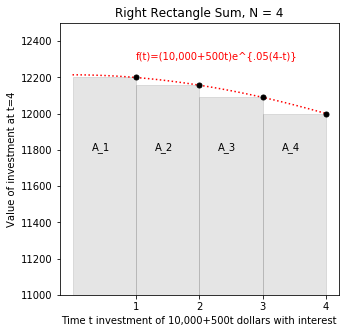

In [5]:
# Problem 2)

f = lambda t : (10000+500*t)*math.e**(.05*(4-t))
a = 0; b = 4; N = 4
n = 10 # Use n*N+1 points to plot the function smoothly
#right endpoint rule
t = np.linspace(a,b,N+1)
y = f(t)
T = np.linspace(a,b,n*N+1)
Y = f(T)

plt.figure(figsize=(5,5))
plt.gca().set_xticks([1,2,3,4])
plt.plot(T,Y,'r', linestyle =':')
t_right = t[1:] # right endpoints
y_right = y[1:]
plt.plot(t_right,y_right,'k.',markersize=10)
plt.bar(t_right,y_right,width=-(b-a)/N,alpha=0.1,align='edge',color='k',edgecolor='k')
plt.title('Right Rectangle Sum, N = {}'.format(N))
plt.xlabel('Time t investment of 10,000+500t dollars with interest')
plt.ylabel('Value of investment at t=4')
plt.text(1,12300,"f(t)=(10,000+500t)e^{.05(4-t)}",color='r')
plt.text(.3,11800,"A_1")
plt.text(1.3,11800,"A_2")
plt.text(2.3,11800,"A_3")
plt.text(3.3,11800,"A_4")
plt.ylim((11000, 12500)) 
#plt.grid()
plt.savefig('4 period.png')
plt.show()


3) Note that

$$e^{.05 (4-t)}=e^{.05(4)}e^{.05(-t)}.$$

4) Note that if we invest $P_4$ at $t=0$, this amount will grow by the end of year 4 to an amount $e^{.05(4)}P_4\approx 48,561.10$. The latter amount is the area under the curve $e^{.05 (4-t)}$ on the interval $0\let\le 4$, which by problem 2) is greater than $A_1+A_2+A_3+A_4$.

5) 

$$P_{\infty}=\int_0^{\infty}(10,000+500t)e^{-.05t}=$$

$$(10,000+500t)(-20e^{-.05t})\mid_0^{\infty} + 10,000(-20)e^{-.05t}\mid_0^{\infty}=$$

$$200,000 + 200,000 = 400,000.$$